In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import nltk
import string
from nltk.corpus import stopwords

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pavithra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Pavithra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pavithra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Load your dataset
data = pd.read_csv('Combined Data.csv')
print(data.head()) #first 5 rows of the data

   Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety


In [3]:
# View basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None


In [4]:
# Drop unnecessary columns
data = data.drop(columns=['Unnamed: 0'])

In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
statement    362
status         0
dtype: int64


In [6]:
# Drop rows with missing text
data = data.dropna(subset=['statement'])

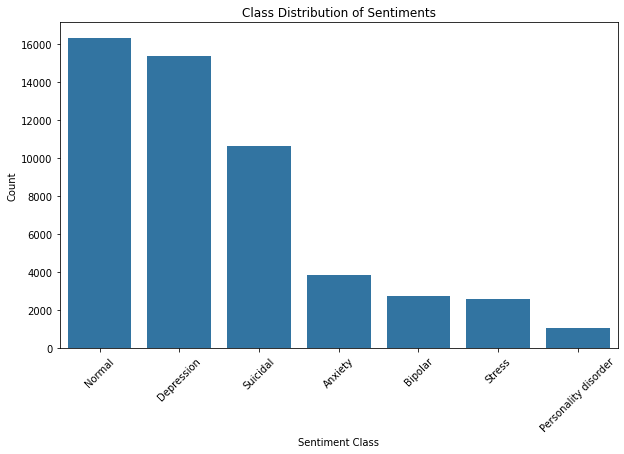

In [7]:
# Plot the distribution of the 'status' column
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='status', order=data['status'].value_counts().index)
plt.title("Class Distribution of Sentiments")
plt.xlabel("Sentiment Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

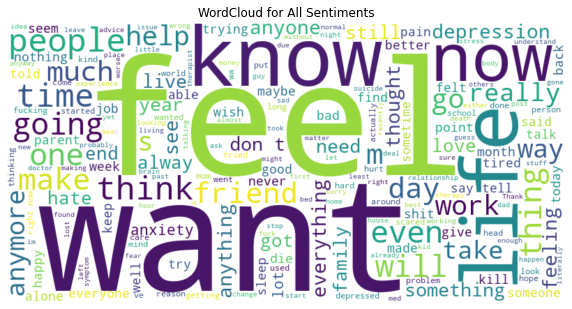

In [8]:
# Combine all text for WordCloud
text = " ".join(data['statement'].dropna())

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("WordCloud for All Sentiments")
plt.axis("off")
plt.show()

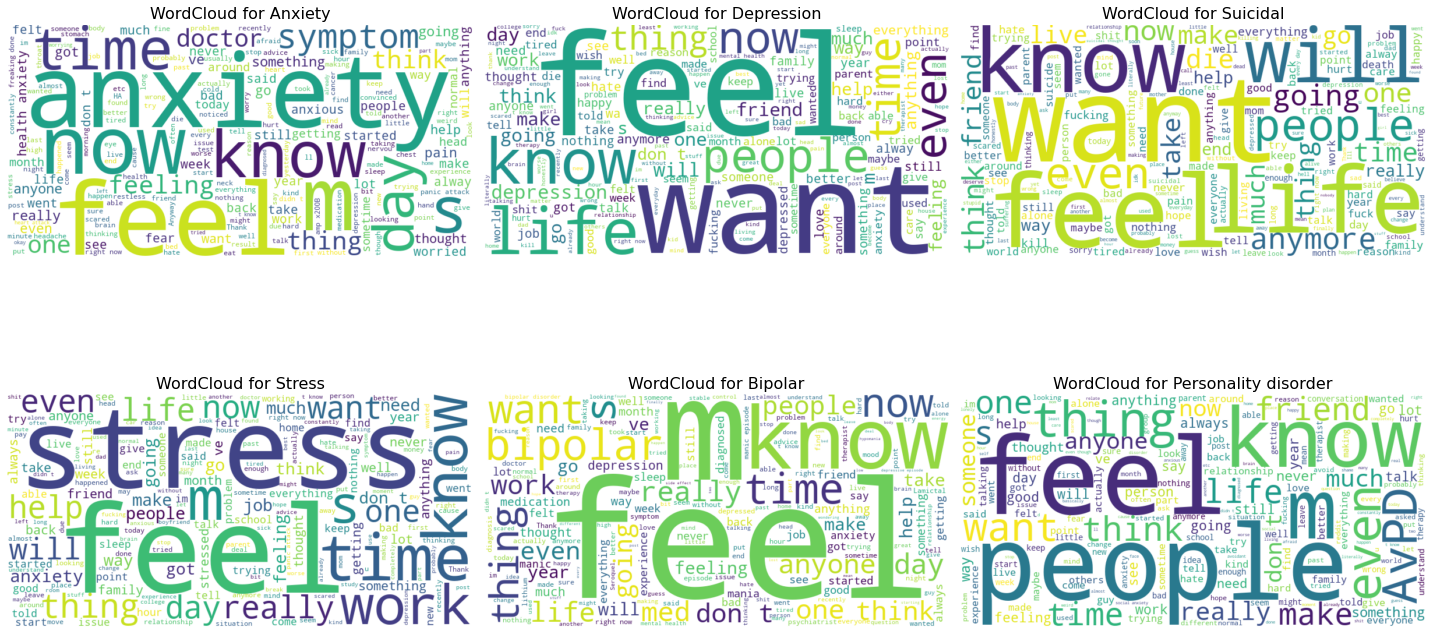

In [9]:
# Filter out the 'Normal' status
statuses = [label for label in data['status'].unique() if label != 'Normal']
# Set up the number of rows and columns for subplots
num_statuses = len(statuses)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_statuses // num_cols) + (num_statuses % num_cols > 0)  # Calculate rows dynamically
# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))
# Flatten axes for easy iteration
axes = axes.flatten()
# Generate WordClouds for each sentiment class, excluding 'Normal'
for i, label in enumerate(statuses):
    text = " ".join(data[data['status'] == label]['statement'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    # Plot the WordCloud in the corresponding subplot
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f"WordCloud for {label}", fontsize=16)
    axes[i].axis("off")
# Turn off unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis("off")
# Display the plots
plt.tight_layout()
plt.show()

In [10]:
# Preprocessing function
# Define stop words
stop_words = set(stopwords.words('english'))
def preprocess_remove_stopwords(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    return " ".join(tokens)

In [11]:
# Apply preprocessing
data['cleaned_statement'] = data['statement'].apply(preprocess_remove_stopwords)

In [12]:
data.head()

,statement,status,cleaned_statement
0,oh my gosh,Anxiety,oh gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,trouble sleeping confused mind restless heart ...
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,wrong back dear forward doubt stay restless re...
3,I've shifted my focus to something else but I'...,Anxiety,ive shifted focus something else im still worried
4,"I'm restless and restless, it's been a month n...",Anxiety,im restless restless month boy mean


### Text Classification

In [13]:
#converting word to vector
# Use TF-IDF to vectorize the cleaned text
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_statement'])
y = data['status']  # Target labels

In [14]:
# Convert to DataFrame
feature_names = vectorizer.get_feature_names_out()  # Get feature names
X = pd.DataFrame(X.toarray(), columns=feature_names)  # Create a DataFrame

# Display the first few rows
print(X.head())

    00  00b  0mg   10  100  1000  100mg  10mg  10th   11  ...  youve   yr  \
0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0   0.0  0.0  ...    0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0   0.0  0.0  ...    0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0   0.0  0.0  ...    0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0   0.0  0.0  ...    0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0   0.0  0.0  ...    0.0  0.0   

   yrs  zero  zoloft  zombie  zone  zoom  zyprexa   ðÿ  
0  0.0   0.0     0.0     0.0   0.0   0.0      0.0  0.0  
1  0.0   0.0     0.0     0.0   0.0   0.0      0.0  0.0  
2  0.0   0.0     0.0     0.0   0.0   0.0      0.0  0.0  
3  0.0   0.0     0.0     0.0   0.0   0.0      0.0  0.0  
4  0.0   0.0     0.0     0.0   0.0   0.0      0.0  0.0  

[5 rows x 5000 columns]


In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [17]:
# Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.82      0.75      0.78       941
             Bipolar       0.86      0.64      0.74       669
          Depression       0.68      0.73      0.70      3792
              Normal       0.84      0.95      0.89      4130
Personality disorder       0.86      0.42      0.57       280
              Stress       0.72      0.44      0.55       654
            Suicidal       0.67      0.63      0.65      2705

            accuracy                           0.75     13171
           macro avg       0.78      0.65      0.70     13171
        weighted avg       0.75      0.75      0.75     13171



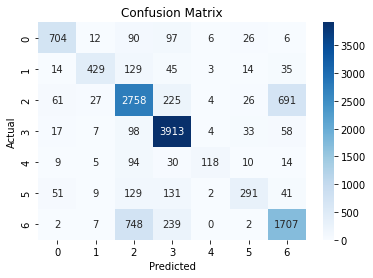

In [18]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Sentiment Analysis

In [19]:
# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores
data['compound'] = data['statement'].apply(lambda x: sia.polarity_scores(x)['compound'])
data['neg'] = data['statement'].apply(lambda x: sia.polarity_scores(x)['neg'])
data['neu'] = data['statement'].apply(lambda x: sia.polarity_scores(x)['neu'])
data['pos'] = data['statement'].apply(lambda x: sia.polarity_scores(x)['pos'])

In [20]:
def categorize_sentiment(compound):
    if compound >= 0.05:
        return "Positive"
    elif compound <= -0.05:
        return "Negative"
    else:
        return "Neutral"

data['predicted_sentiment'] = data['compound'].apply(categorize_sentiment)


In [21]:
data.head()

,statement,status,cleaned_statement,compound,neg,neu,pos,predicted_sentiment
0,oh my gosh,Anxiety,oh gosh,0.0000,0.000,1.000,0.000,Neutral
1,"trouble sleeping, confused mind, restless hear...",Anxiety,trouble sleeping confused mind restless heart ...,-0.7269,0.504,0.496,0.000,Negative
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,wrong back dear forward doubt stay restless re...,-0.7351,0.480,0.392,0.127,Negative
3,I've shifted my focus to something else but I'...,Anxiety,ive shifted focus something else im still worried,-0.4215,0.219,0.781,0.000,Negative
4,"I'm restless and restless, it's been a month n...",Anxiety,im restless restless month boy mean,-0.4939,0.276,0.724,0.000,Negative


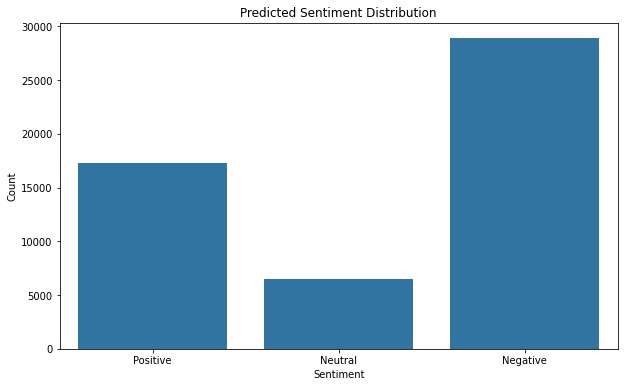

In [22]:
# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='predicted_sentiment', order=['Positive', 'Neutral', 'Negative'])
plt.title("Predicted Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

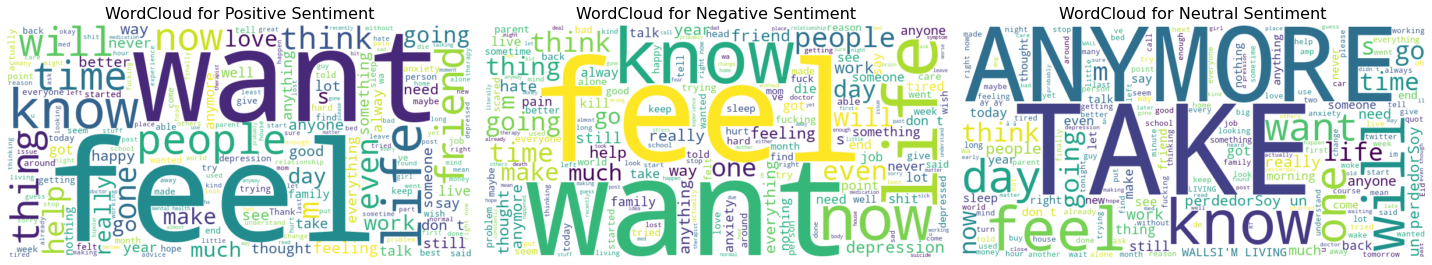

In [23]:
# Define sentiments
sentiments = ['Positive', 'Negative', 'Neutral']
# Create a figure with 3 subplots in one row
fig, axes = plt.subplots(1, 3, figsize=(20, 8))  # 1 row, 3 columns
# Generate WordClouds for each sentiment
for i, sentiment in enumerate(sentiments):
    text = " ".join(data[data['predicted_sentiment'] == sentiment]['statement'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot WordCloud on the corresponding subplot
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f"WordCloud for {sentiment} Sentiment", fontsize=16)
    axes[i].axis("off")
# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [24]:
import pandas as pd
from nltk import FreqDist
from nltk.tokenize import word_tokenize

# Tokenize the text for positive and negative sentiments
positive_tokens = word_tokenize(" ".join(data[data['predicted_sentiment'] == 'Positive']['statement'].dropna()).lower())

# Create frequency distributions
positive_freqdist = FreqDist(positive_tokens)

# Convert FreqDist to DataFrame
positive_freq_table = pd.DataFrame(positive_freqdist.most_common(), columns=['Word', 'Frequency'])

positive_freq_table.head()

,Word,Frequency
0,i,125313
1,.,77579
2,to,62219
3,",",56120
4,and,52623


In [25]:
negative_tokens = word_tokenize(" ".join(data[data['predicted_sentiment'] == 'Negative']['statement'].dropna()).lower())
negative_freqdist = FreqDist(negative_tokens)
negative_freq_table = pd.DataFrame(negative_freqdist.most_common(), columns=['Word', 'Frequency'])
negative_freq_table.head()

,Word,Frequency
0,i,300262
1,.,177848
2,to,132574
3,and,121397
4,",",117327


In [26]:
# Function to clean tokens by removing stop words, punctuation, and specific characters
def clean_tokens(tokens):
    # Define stop words and punctuation
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    # Clean tokens
    return [
        word for word in tokens 
        if word not in stop_words and word not in punctuation and len(word) > 1
    ]
# Clean positive and negative tokens
positive_cleaned_tokens = clean_tokens(positive_tokens)
negative_cleaned_tokens = clean_tokens(negative_tokens)
# Create frequency distributions for cleaned tokens
positive_cleaned_freqdist = FreqDist(positive_cleaned_tokens)
negative_cleaned_freqdist = FreqDist(negative_cleaned_tokens)
# Convert cleaned FreqDist to DataFrame
positive_cleaned_freq_table = pd.DataFrame(positive_cleaned_freqdist.most_common(), columns=['Word', 'Frequency'])
negative_cleaned_freq_table = pd.DataFrame(negative_cleaned_freqdist.most_common(), columns=['Word', 'Frequency'])
# Display top 10 frequent words for both categories
print("Top 10 Positive Words:")
print(positive_cleaned_freq_table.head(10))
print("\nTop 10 Negative Words:")
print(negative_cleaned_freq_table.head(10))

Top 10 Positive Words:
     Word  Frequency
0    like      14027
1    feel       9891
2    want       8138
3    know       7196
4    life       6571
5     get       6386
6    time       5878
7   would       5784
8  really       5501
9  people       5487

Top 10 Negative Words:
     Word  Frequency
0    like      24014
1    feel      21453
2    want      18911
3    know      16012
4    life      15511
5     get      14984
6    even      13289
7    time      11837
8   would      11194
9  people      11053


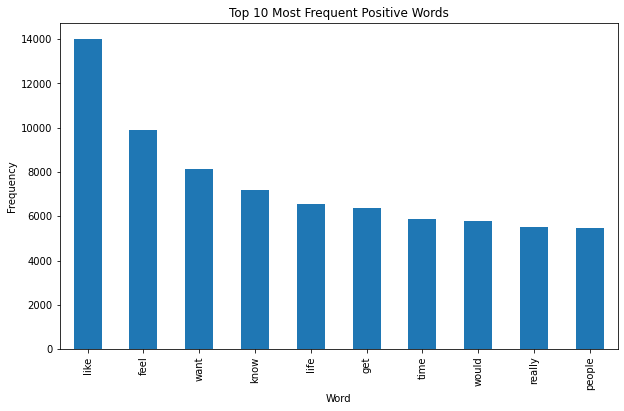

In [27]:
# Plot the top 10 most frequent words
positive_cleaned_freq_table.head(10).set_index('Word').plot(
    kind='bar', figsize=(10, 6), legend=False, title="Top 10 Most Frequent Positive Words"
)
plt.ylabel("Frequency")
plt.show()

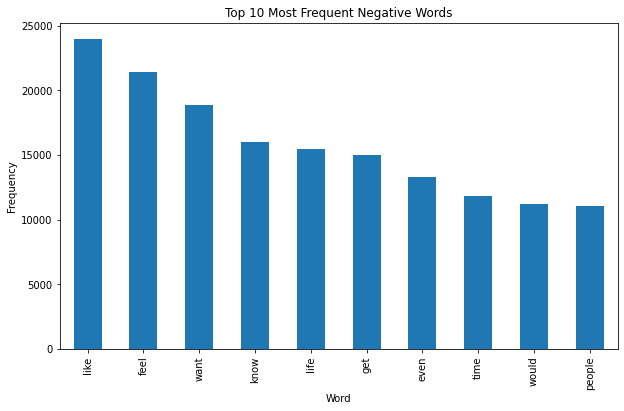

In [28]:
negative_cleaned_freq_table.head(10).set_index('Word').plot(
    kind='bar', figsize=(10, 6), legend=False, title="Top 10 Most Frequent Negative Words"
)
plt.ylabel("Frequency")
plt.show()